In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [31]:
dfx = pd.read_csv('./train.csv')
#dfy = pd.read_csv('./data/ydata.csv')
dfx.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
x = dfx.values[:,1:]
y = dfx.values[:,0]
print(x.shape)

y = y.reshape((-1,))
print(y.shape)

(42000, 784)
(42000,)


In [41]:
#train test split 80-20%

split = int(0.8*(x.shape[0]))
x_train = x[:split]
x_test = x[split:]
y_train = y[:split]
y_test = y[split:]

print(x_train.shape,y_test.shape)

(33600, 784) (8400,)


In [25]:
def distance(x,q):
    return np.sqrt(sum((x-q)**2))

def knn(x,y,query,k=5):
    vals = []
    for i in range(x.shape[0]):
        d = distance(x[i],query)
        vals.append((d,y[i]))
        
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    data = np.unique(vals[:,1],return_counts = True)
    print(data)
    ind = data[1].argmax()
    result = data[0][ind]
    return result


In [47]:
#draw images
def drawImg(sample):
    flat_2_img = sample.reshape((28,28))
    plt.imshow(flat_2_img)
    plt.show()
    

In [55]:
#testing
pred = knn(x_train,y_train,x_test[100])

(array([5.]), array([5], dtype=int64))


In [56]:
print(pred)

5.0


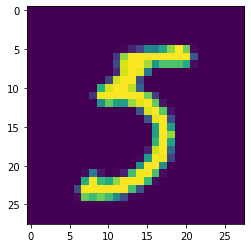

In [57]:
drawImg(x_test[100])